<a href="https://colab.research.google.com/github/shailesh00v7/YBI_project/blob/main/YBI_MileagePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIleage Predictiction-Regression analysis

# **Source:**
This dataset was taken from the Statlib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.
# **Data Set Information:**
This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute 'mpg', 8 of the original instances were removed because they had unknown values for the 'mpg" attribute. The original dataset is available in the file auto-mpg.data-original "The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes" (Quinlan, 1993)
# **Attribute Information:**
1. mpg: continuous
2. cylinders multi-valued discrete
3. displacement: continuous
4. horsepower continuous
5. weight continuous
6. acceleration continuous
7. model year: multi-valued discrete
8. origin multi-valued discrete
9. car name string (unique for each instance)

# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Import data

In [2]:
from google.colab import files
uploaded=files.upload()

Saving MPG.csv to MPG.csv


In [3]:
mpg=pd.read_csv("MPG.csv")

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Describe data

In [5]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Data Visualisation

In [6]:
mpg.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

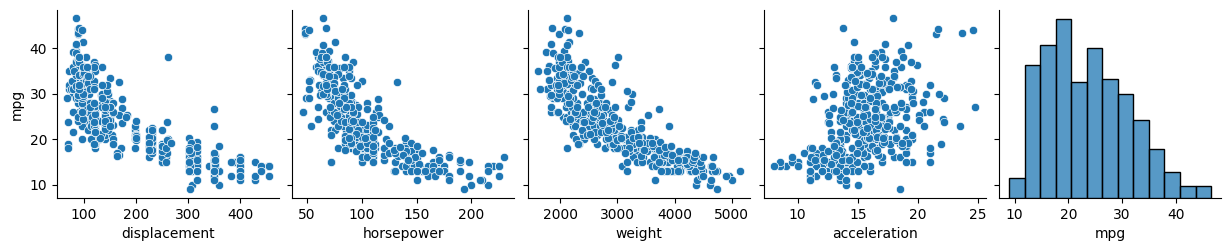

In [8]:
sns.pairplot(mpg,x_vars=[ 'displacement', 'horsepower', 'weight',
       'acceleration','mpg'],y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

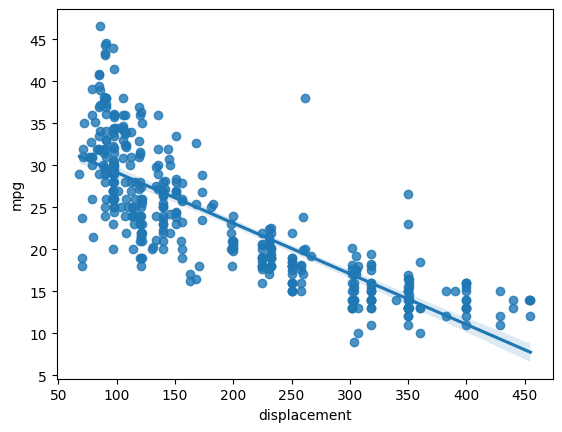

In [9]:
sns.regplot(x="displacement",y="mpg",data=mpg)

# Data Preprocessing


In [10]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [20]:
mpg=mpg.dropna()

In [21]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# Define Target Variable (y) and Feature Variables (X)

In [22]:
y=mpg['mpg']
x=mpg[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']]

# Train Test Split

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529)

# Modeling

In [34]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# Model Evaluation

In [35]:
model.fit(x_train,y_train)

LinearRegression()

In [36]:
model.intercept_

-10.578824495428872

In [37]:
model.coef_

array([-0.25410763,  0.00727881, -0.00074385, -0.0070636 , -0.07172194,
        0.73830523])

# Prediction

In [38]:
y_pred=model.predict(x_test)
y_pred

array([28.25582217, 21.58590356, 31.10895891, 29.99826467, 28.07079722,
       15.99581927, 30.38391426, 12.51921933, 11.02260522, 29.88447653,
       29.48597454, 32.8227999 , 31.13339172,  8.52132869, 24.6728121 ,
       23.62878906, 22.0794481 , 31.85876214, 30.79951112, 32.80330043,
       32.72431264, 32.60913306, 26.3259241 , 32.42895291,  6.38704281,
       24.90821027, 22.32687984, 18.04668564, 30.41321442, 33.35607814,
       17.38652916, 19.43046065, 15.84616733, 33.45641791, 30.60349245,
       24.62748219, 19.09263796, 24.89570225, 26.73463097, 10.20998349,
       19.69866909, 24.04341837, 16.73802806, 15.91192125, 11.74856739,
       29.71359735, 23.35921871, 20.60262583, 31.35571433, 20.54367021,
       15.17370733, 27.69266429, 31.65566398, 23.25483405, 26.62860495,
       30.21398228, 28.31393939, 23.62266387, 20.8069417 , 21.35175319,
       31.04866393, 13.12557554, 35.16575363, 26.23029352, 25.45693608,
       21.7283434 , 21.61822409, 34.37995629, 27.89950433, 19.82

In [39]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.12600060764830928

# Explanation

Mileage predicton is done with the help of a **linear regression  model**.this regression made the prediction at the rate of **12%** **error rate**. That means this model has a **success rate** of **88%**.